In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime
import platform

path = "C:/Windows/Fonts/H2GTRE.TTF"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
# #rc('font', family=font_name)
rc('font', family='Gothic')

%matplotlib inline
plt.rc('font', family=font_name)

Importing plotly failed. Interactive plots will not work.


In [2]:
기상청=pd.read_csv('data/날씨.csv') # 날씨정보 읽어오기

In [3]:
기상청.isnull().sum() # 날씨 df의 결측치 찾기

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [4]:
기상청[기상청['최고기온'].isnull()] # 결측치 위치 찾기
기상청=기상청.fillna(20.5) # 결측치 20.5로 조정
기상청

,날짜,지점,평균기온,최저기온,최고기온
0,1994-12-13,108,-1.5,-3.3,0.7
1,1994-12-14,108,-2.1,-5.5,-0.4
2,1994-12-15,108,-7.2,-10.3,-3.5
3,1994-12-16,108,-8.7,-12.6,-4.2
4,1994-12-17,108,-5.6,-8.7,-1.9
...,...,...,...,...,...
9348,2020-07-17,108,26.0,21.5,31.6
9349,2020-07-18,108,26.1,22.8,31.0
9350,2020-07-19,108,24.0,20.6,26.6
9351,2020-07-20,108,23.8,22.4,26.6


In [5]:
기상청.info() # df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353 entries, 0 to 9352
Data columns (total 5 columns):
날짜      9353 non-null object
지점      9353 non-null int64
평균기온    9353 non-null float64
최저기온    9353 non-null float64
최고기온    9353 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 365.5+ KB


In [22]:
# 12-13을 가진 데이터 리스트화
br=[]

for x in 기상청['날짜']:
    test=x.split("-")
    if test[1] =='12' and test[2]=='13':
        br.append(x)
br


['1994-12-13',
 '1995-12-13',
 '1996-12-13',
 '1997-12-13',
 '1998-12-13',
 '1999-12-13',
 '2000-12-13',
 '2001-12-13',
 '2002-12-13',
 '2003-12-13',
 '2004-12-13',
 '2005-12-13',
 '2006-12-13',
 '2007-12-13',
 '2008-12-13',
 '2009-12-13',
 '2010-12-13',
 '2011-12-13',
 '2012-12-13',
 '2013-12-13',
 '2014-12-13',
 '2015-12-13',
 '2016-12-13',
 '2017-12-13',
 '2018-12-13',
 '2019-12-13']

In [7]:
# 생일의 날씨를 가져옴 
생일날씨=기상청[기상청['날짜'].isin(br)]
생일날씨

,날짜,지점,평균기온,최저기온,최고기온
0,1994-12-13,108,-1.5,-3.3,0.7
365,1995-12-13,108,3.1,-0.4,5.9
731,1996-12-13,108,5.2,0.9,10.3
1096,1997-12-13,108,-1.2,-5.4,3.1
1461,1998-12-13,108,4.8,1.0,9.8
1826,1999-12-13,108,0.9,-1.7,3.5
2192,2000-12-13,108,-0.2,-4.4,4.4
2557,2001-12-13,108,-2.6,-5.6,4.2
2922,2002-12-13,108,-3.0,-7.2,1.3
3287,2003-12-13,108,0.4,-3.5,4.5


<AxesSubplot:>

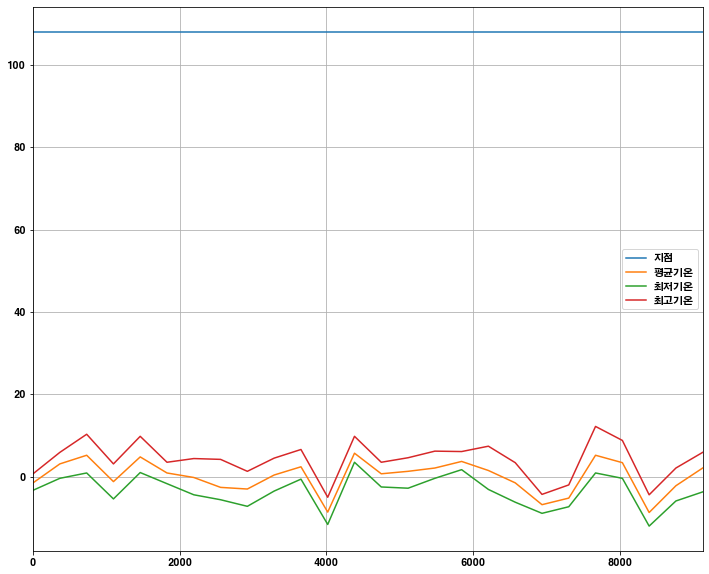

In [8]:
생일날씨.plot(figsize=(12,10), grid=True) # 생일 날씨 그래프화

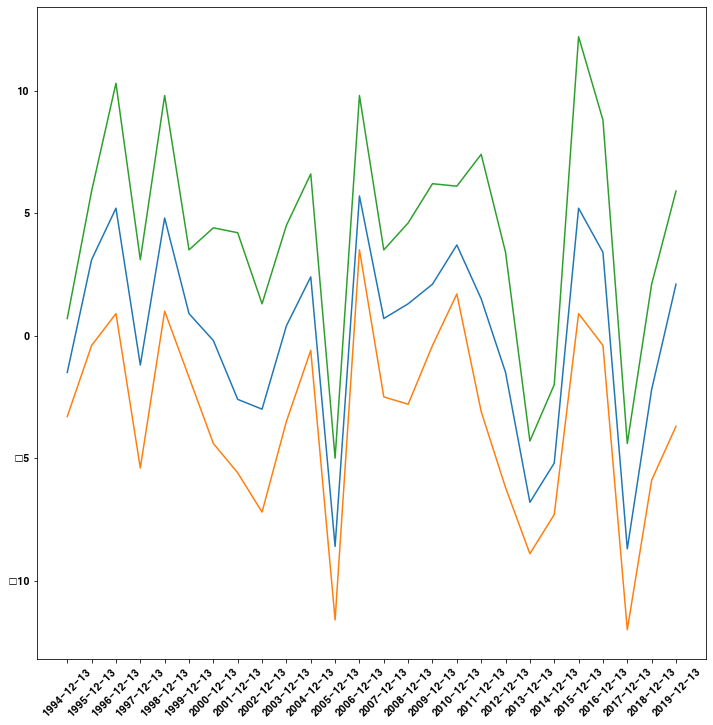

In [9]:
# x,y 지정해서 그래프 그려주기
x=생일날씨['날짜']
y=생일날씨['평균기온']
y1=생일날씨['최저기온']
y2=생일날씨['최고기온']
plt.figure(figsize=(12,12))
plt.plot(x,y,x,y1,x,y2)
plt.xticks(rotation=45)
plt.show()

In [10]:
# 예측하기 위해 ds :날짜 / y :평균기온 DF를 만들어줌
df=기상청[['날짜','평균기온']]
df=df.rename(columns={"날짜": "ds", "평균기온": "y"})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353 entries, 0 to 9352
Data columns (total 2 columns):
ds    9353 non-null object
y     9353 non-null float64
dtypes: float64(1), object(1)
memory usage: 146.3+ KB


,ds,y
0,1994-12-13,-1.5
1,1994-12-14,-2.1
2,1994-12-15,-7.2
3,1994-12-16,-8.7
4,1994-12-17,-5.6
...,...,...
9348,2020-07-17,26.0
9349,2020-07-18,26.1
9350,2020-07-19,24.0
9351,2020-07-20,23.8


In [15]:
# 예측데이터 만들기
m= Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=60)
future.tail()
future

,ds
0,1994-12-13
1,1994-12-14
2,1994-12-15
3,1994-12-16
4,1994-12-17
...,...
9408,2020-09-15
9409,2020-09-16
9410,2020-09-17
9411,2020-09-18


In [12]:
forecast = m.predict(future) # 학습

In [17]:
# 7-22 기준 5일 기온 예측
tt=['2020-07-23','2020-07-24','2020-07-25','2020-07-26','2020-07-27']
forecast[forecast['ds'].isin(tt)]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9354,2020-07-23,2.634545,22.858884,30.618517,2.634545,2.634545,24.187104,24.187104,24.187104,10.882402,...,-0.040441,-0.040441,-0.040441,13.345142,13.345142,13.345142,0.0,0.0,0.0,26.821649
9355,2020-07-24,2.634677,23.094365,30.907999,2.634677,2.634677,24.404787,24.404787,24.404787,10.882402,...,0.033344,0.033344,0.033344,13.489040,13.489040,13.489040,0.0,0.0,0.0,27.039464
9356,2020-07-25,2.634809,23.521624,31.615118,2.634809,2.634809,24.613622,24.613622,24.613622,10.882402,...,0.103127,0.103127,0.103127,13.628093,13.628093,13.628093,0.0,0.0,0.0,27.248430
9357,2020-07-26,2.634940,23.444971,31.434395,2.634940,2.634940,24.717955,24.717955,24.717955,10.882402,...,0.074671,0.074671,0.074671,13.760882,13.760882,13.760882,0.0,0.0,0.0,27.352896
9358,2020-07-27,2.635072,23.399076,31.288957,2.635072,2.635072,24.809059,24.809059,24.809059,10.882402,...,0.040644,0.040644,0.040644,13.886012,13.886012,13.886012,0.0,0.0,0.0,27.444130


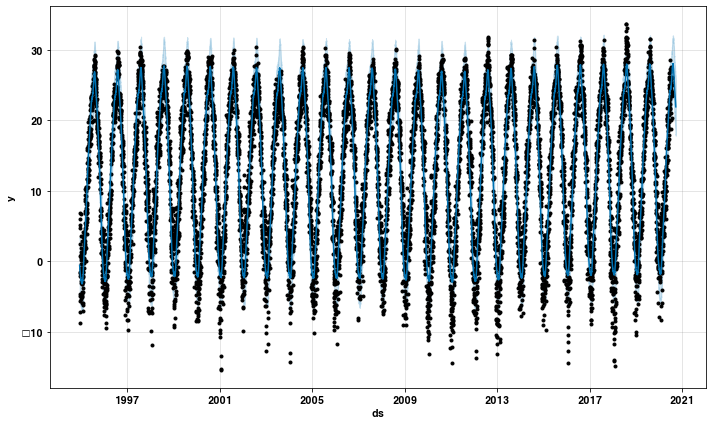

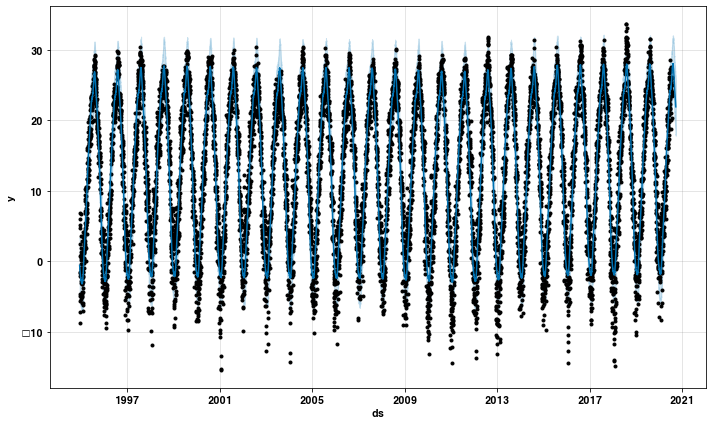

In [13]:
m.plot(forecast) # 1994~2021 평균기온 그래프

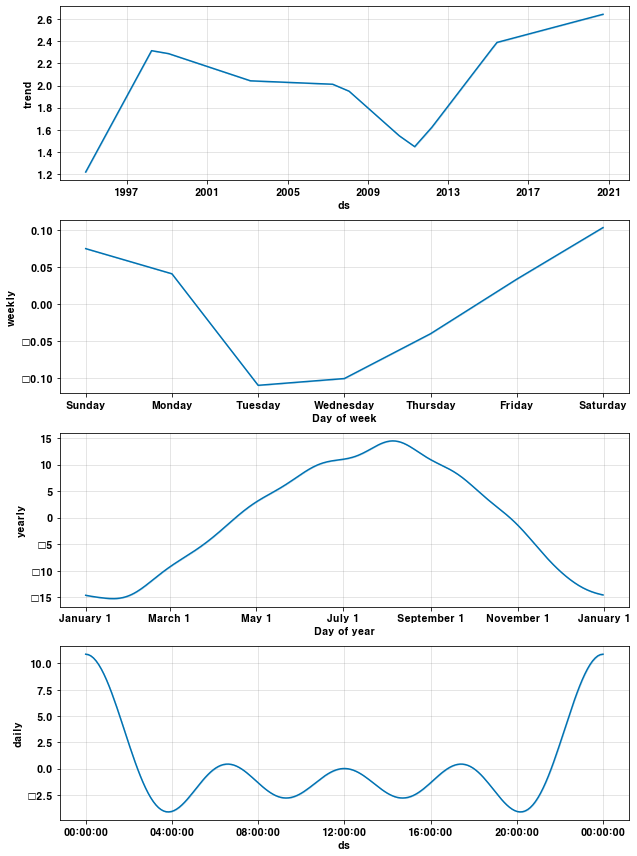

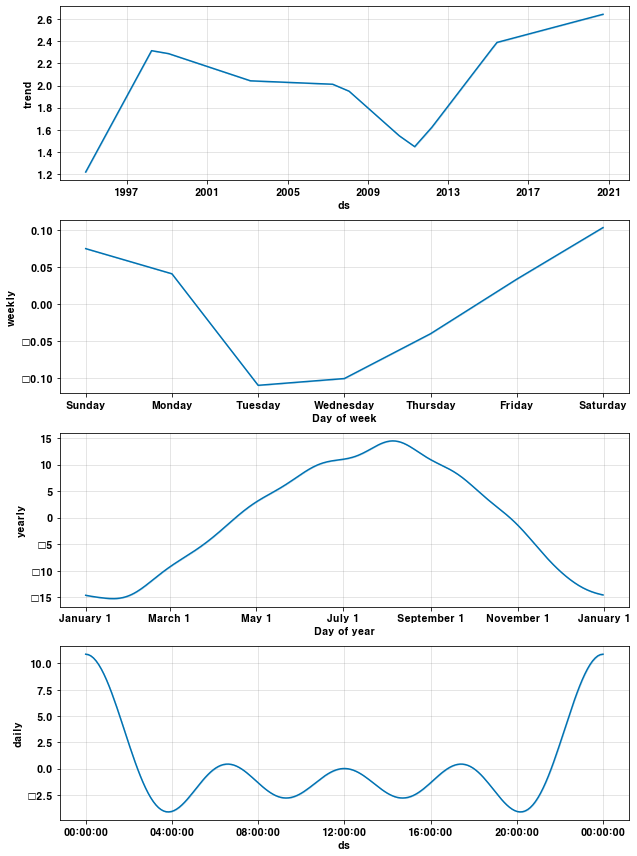

In [14]:
m.plot_components(forecast) # 각 데이터 별 그래프